In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [3]:
# Task 3.4

In [4]:
from CartPoleNoise_ import CartPoleDynamicGaussianNoisyObsDyn

target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
model_3_4 = NonLinearObserver.initialize_model(N=13, M=8, with_action=True)
model_3_4.load_model("./models/3_4__13__8")

In [5]:
from shared import get_trend



Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

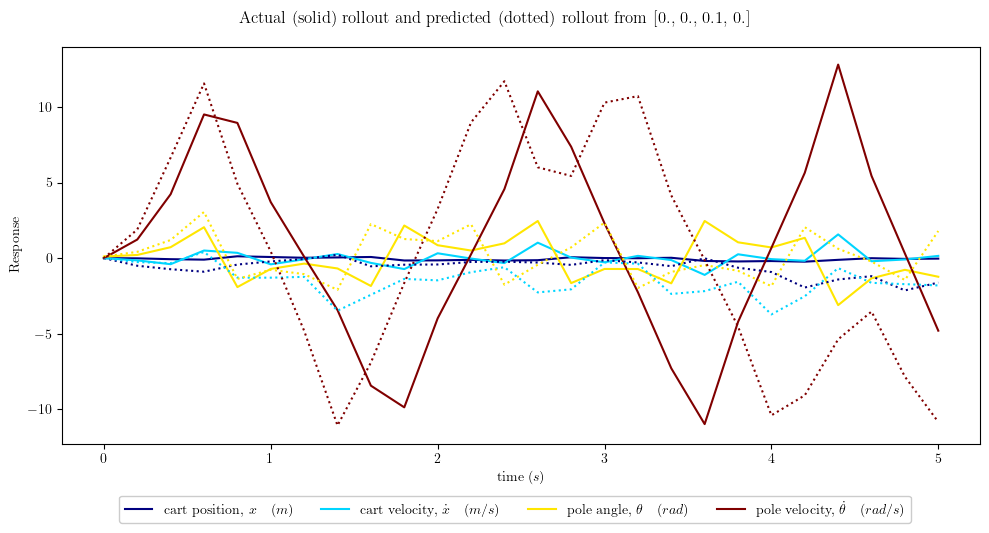

In [6]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_4.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

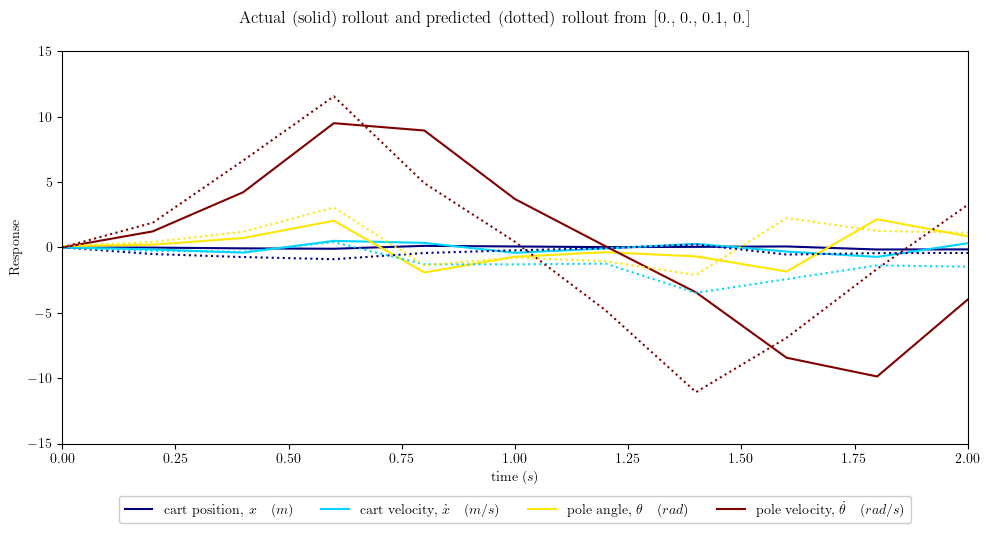

In [7]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_4.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)
ax.set(ylim=(-15, 15), xlim=(0, 2))
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

[ 0.99062362  1.02187412 12.26874513  2.01875569]


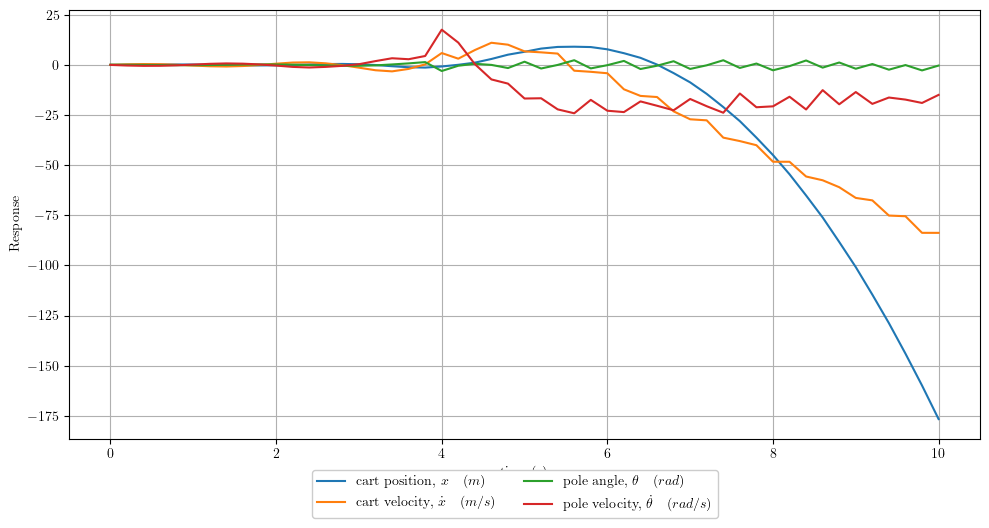

In [8]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1,  1, 13,  2])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 0.98443301  1.00271485 11.80865471  2.1323142 ]


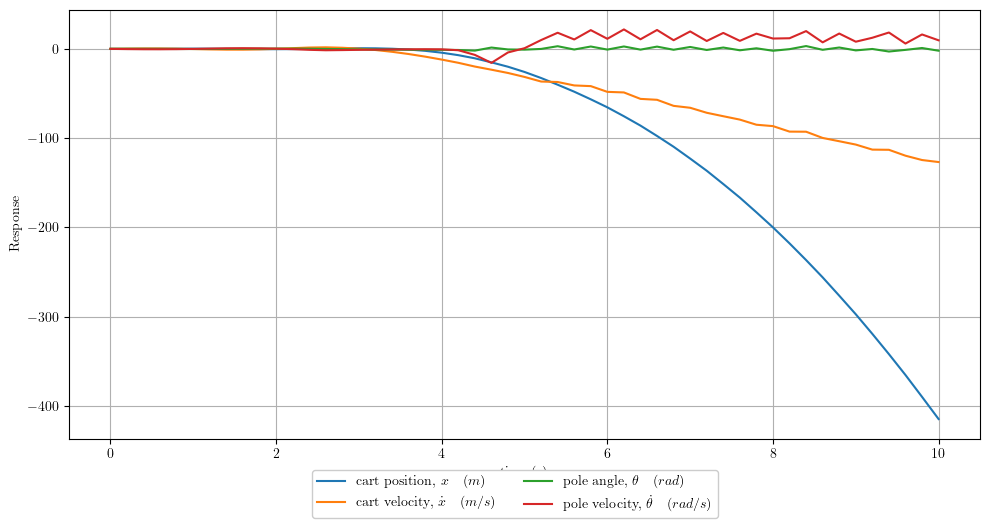

In [9]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 0.99062362,  1.02187412, 12.26874513,  2.01875569])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 0.94,  1.02, 12.25,  2.17]


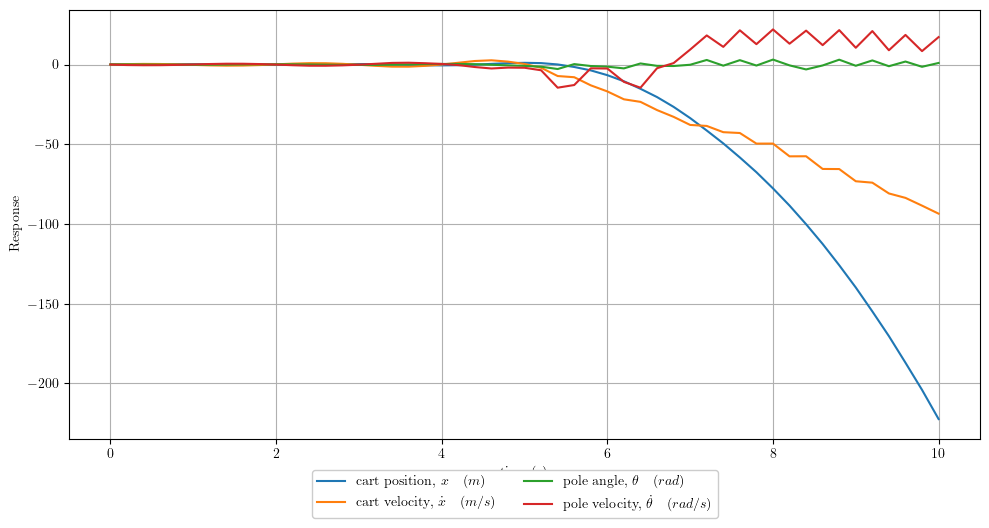

In [10]:
from optimizer import Optimizer
from shared import np_to_string

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 0.98443301,  1.00271485, 11.80865471,  2.1323142 ])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(np_to_string(p_opt))

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 0.93,  1.00, 11.79,  2.29]


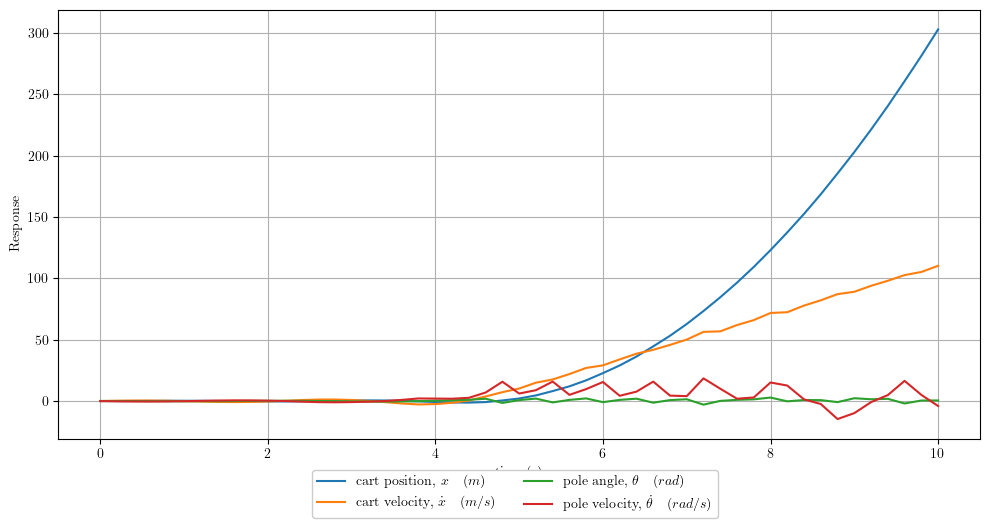

In [11]:
from optimizer import Optimizer
from shared import np_to_string

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 0.94,  1.02, 12.25,  2.17])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(np_to_string(p_opt))

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 0.93,  1.00, 11.75,  2.29]


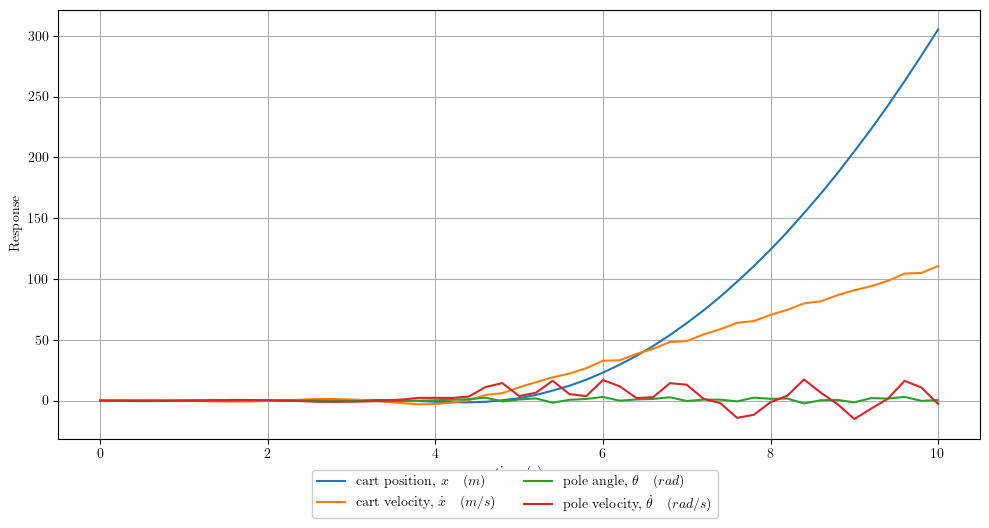

In [12]:
from optimizer import Optimizer
from shared import np_to_string

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 0.93,  1.00, 11.79,  2.29])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=5, remap=True)
controller.p = p_opt
print(np_to_string(p_opt))

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.89540441  2.1942323  17.32360199  3.09005687]


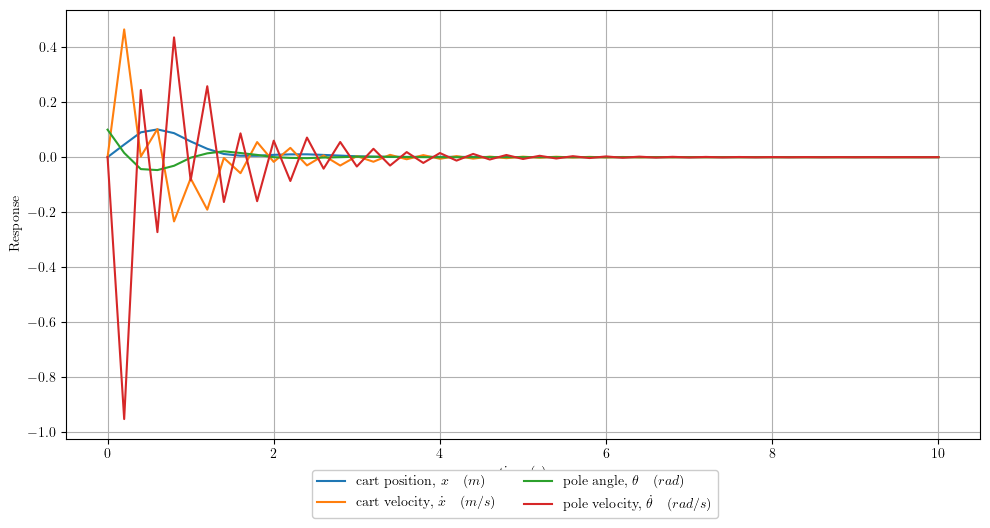

In [13]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleDynamicGaussianNoisyObsDyn(False, loc=0, factor=0.1)
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.8   2.2  17.5   3.15]


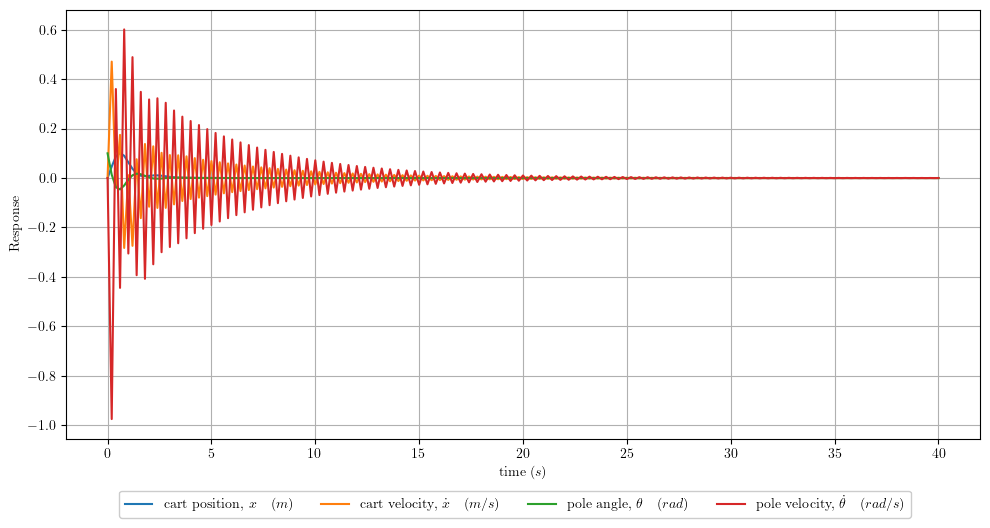

In [18]:
from optimizer import Optimizer

optimizer = Optimizer()
target = model_3_4
target_no_noise = CartPole(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=40)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)